# MACHINE LEARNING

In [1]:
# Data Analysis

import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Use scikitlearning for Data Pre-processing
# Using the Minmax Scaler( Used to normalize data btwn 0 and 1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifiers Libraries are the Machine Learning Algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


In [2]:
# Load dataset
df=pd.read_csv('heart.csv')

In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Statistical Analysis
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<AxesSubplot:>

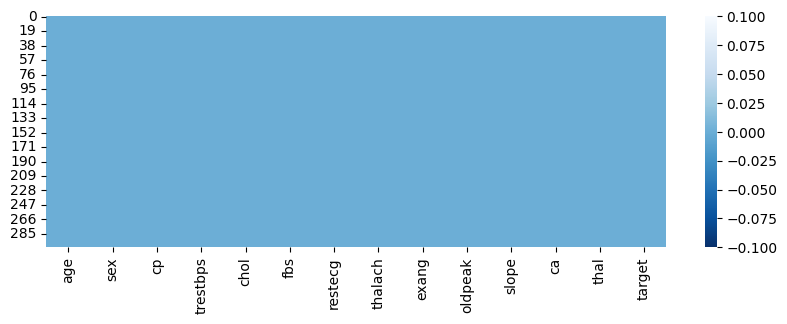

In [7]:
# Check for missing values
print (df.isnull().sum())

#visualize the missing data
plt.figure(figsize=(10,3)) # Making the figsize small so as not to occupy space.
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

### Exploratory Data Analysis (EDA)

## Univariate Analysis 
### Here we are working on few columns

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot:xlabel='thal'>

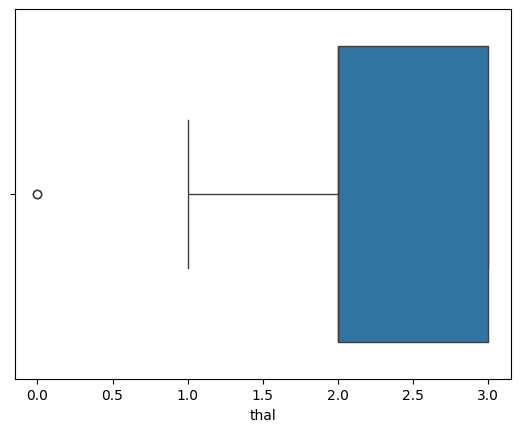

In [9]:
# Check for Outliers
sns.boxplot(x=df["thal"])

<AxesSubplot:xlabel='chol'>

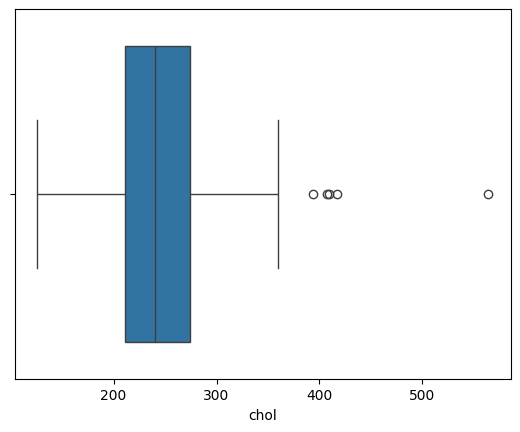

In [10]:
# Check for outliers in the cholesterol level
sns.boxplot(x=df["chol"])

<AxesSubplot:xlabel='trestbps'>

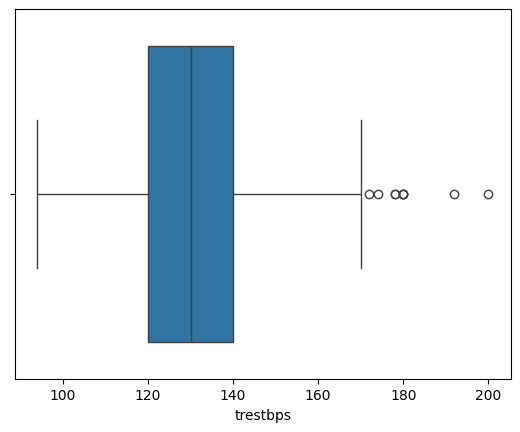

In [11]:
# Check for outliers in the resting blood pressure level
sns.boxplot(x=df["trestbps"])

In [12]:
# because we have outliers we have to normalize the data


<AxesSubplot:xlabel='thalach'>

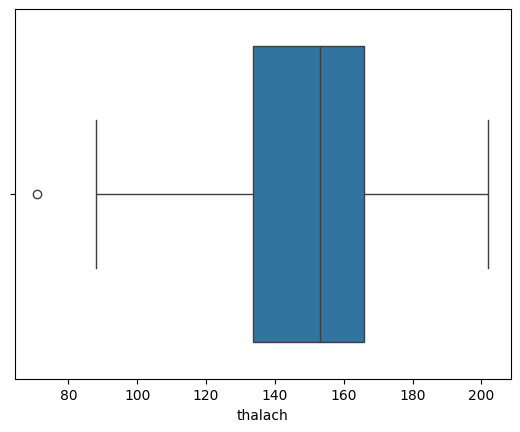

In [13]:
# Check for outliers in the max_heart rate achieve 
sns.boxplot(x=df["thalach"])

Text(0.5, 1.0, 'Total Number of Patients')

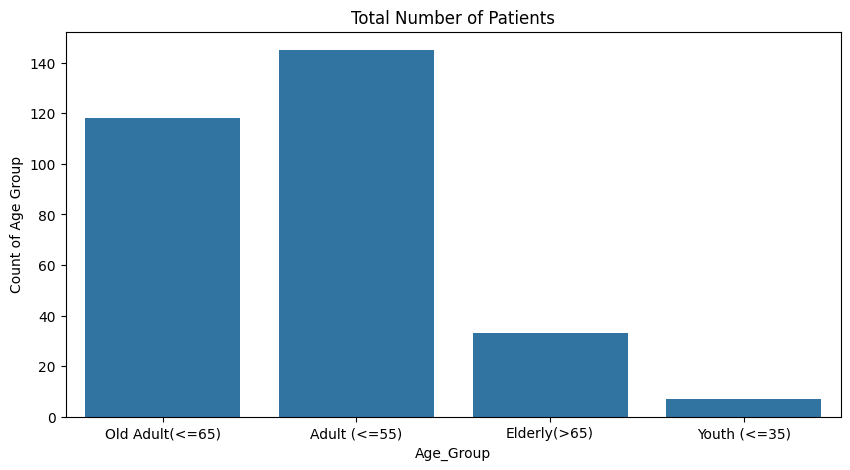

In [14]:
# Data Visualization
# Age_bracket
def age_bracket(age):
    if age <=35:
        return "Youth (<=35)"
    elif age <=55:
        return "Adult (<=55)"
    elif age <=65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
df["age_bracket"] = df["age"].apply(age_bracket)

#Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x="age_bracket", data=df)
plt.xlabel("Age_Group")
plt.ylabel("Count of Age Group")
plt.title("Total Number of Patients")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bracket
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65)


Text(0.5, 1.0, 'Total Number of Patients')

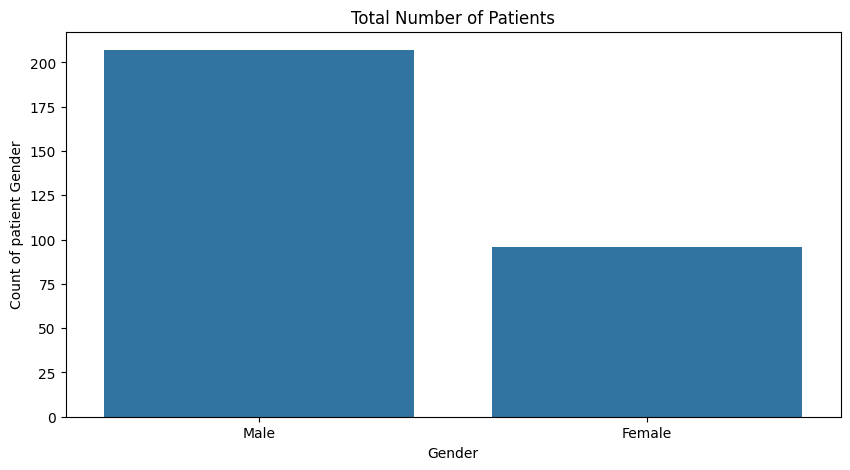

In [16]:
# Age_bracket
def gender(sex):
    if sex ==1:
        return "Male"
    else:
        return "Female"
df["gender"] = df["sex"].apply(gender)

#Investigating the gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=df)
plt.xlabel("Gender")
plt.ylabel("Count of patient Gender")
plt.title("Total Number of Patients")

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


Text(0.5, 1.0, 'Total Number of Patients')

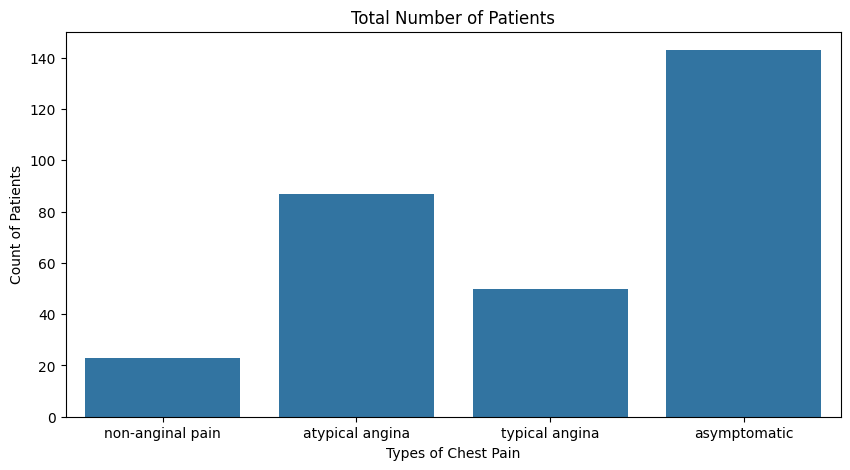

In [18]:
# Data Visualization
# Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain 4: asymptomatic)
def chest_pain(cp):
    if cp ==1:
        return "typical angina"
    elif cp ==2:
        return "atypical angina"
    elif cp ==3:
        return "non-anginal pain"
    else:
        return "asymptomatic"
df["cp_cat"] = df["cp"].apply(chest_pain)

#Investigating the chest pain types for patients
plt.figure(figsize=(10,5))
sns.countplot(x="cp_cat", data=df)
plt.xlabel("Types of Chest Pain")
plt.ylabel("Count of Patients")
plt.title("Total Number of Patients")

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_bracket',
       'gender', 'cp_cat'],
      dtype='object')

Yes    165
No     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

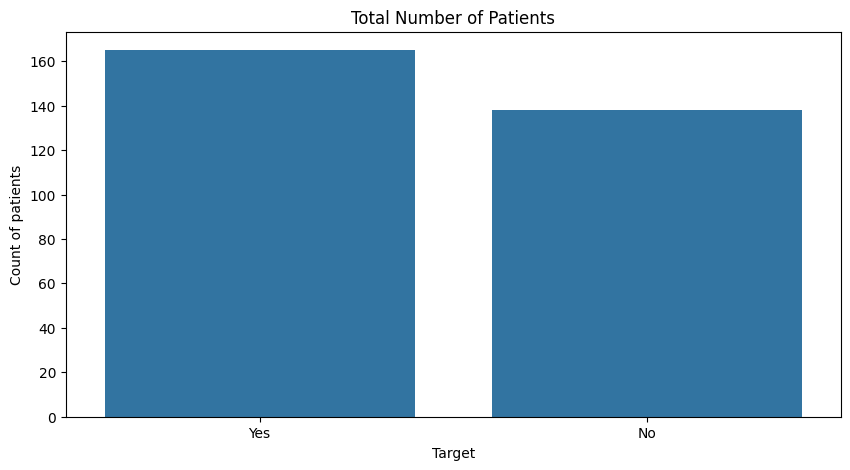

In [20]:
# Data Visuzlization
# Target - have hear disease or not(1 =yes, 0 =no) 
def label(target):
    if target ==1:
        return "Yes"
    else:
        return "No"
df["label"] = df["target"].apply(label)

# Total Number of patient in each category
print(df["label"].value_counts())

#Investigating if patients have Heart Disease or Not
plt.figure(figsize=(10,5))
sns.countplot(x="label", data=df)
plt.xlabel("Target")
plt.ylabel("Count of patients")
plt.title("Total Number of Patients")

## Bivariate Analysis

Text(0.5, 1.0, 'Total Number of Patients')

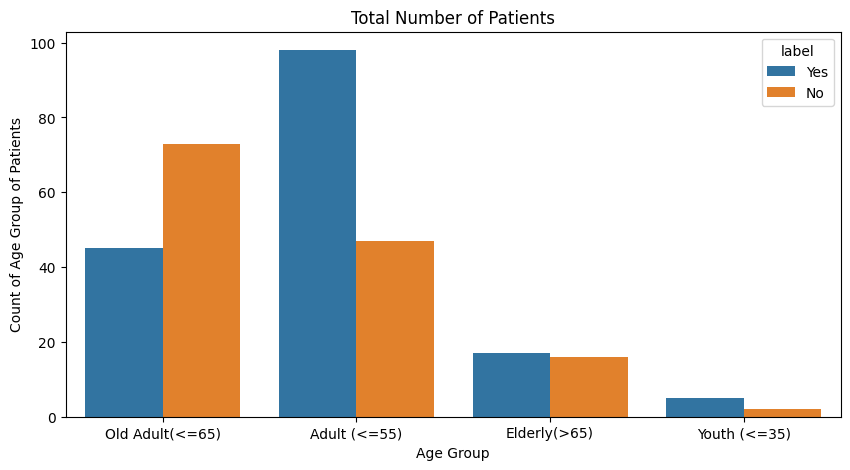

In [21]:
# Investigating the age group of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x="age_bracket", data=df, hue="label")
plt.xlabel("Age Group")
plt.ylabel("Count of Age Group of Patients")
plt.title("Total Number of Patients")

Text(0.5, 1.0, 'Total Number of Patients')

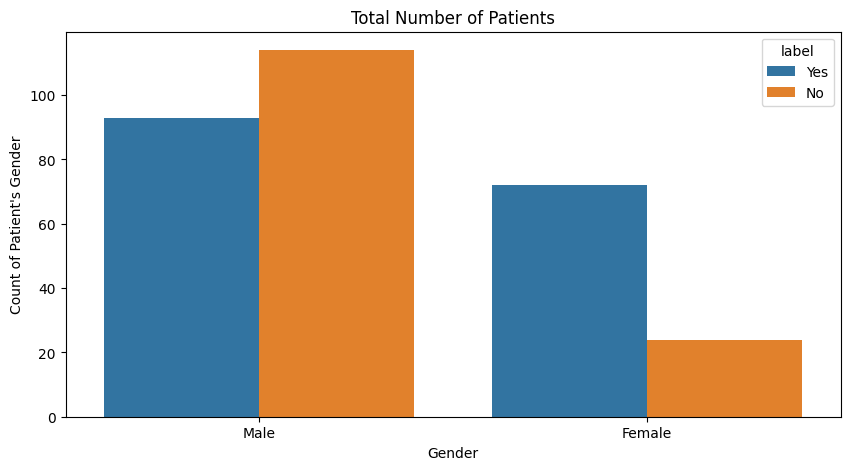

In [22]:
# Investigating the Gender of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x="gender", data=df, hue="label")
plt.xlabel("Gender")
plt.ylabel("Count of Patient's Gender")
plt.title("Total Number of Patients")

Text(0.5, 1.0, 'Total Number of Patients')

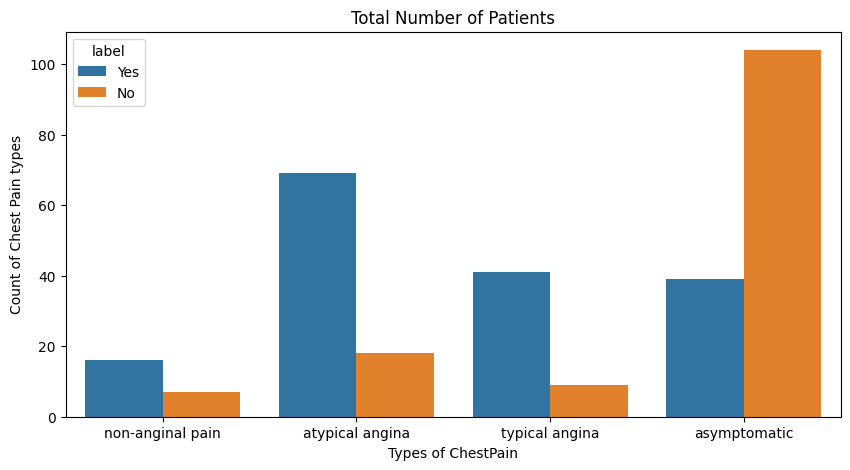

In [23]:
# Investigating the Gender of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x="cp_cat", data=df, hue="label")
plt.xlabel("Types of ChestPain")
plt.ylabel("Count of Chest Pain types")
plt.title("Total Number of Patients")

## Multivariate Analysis 
### Here we are looking at more than 2 columns.

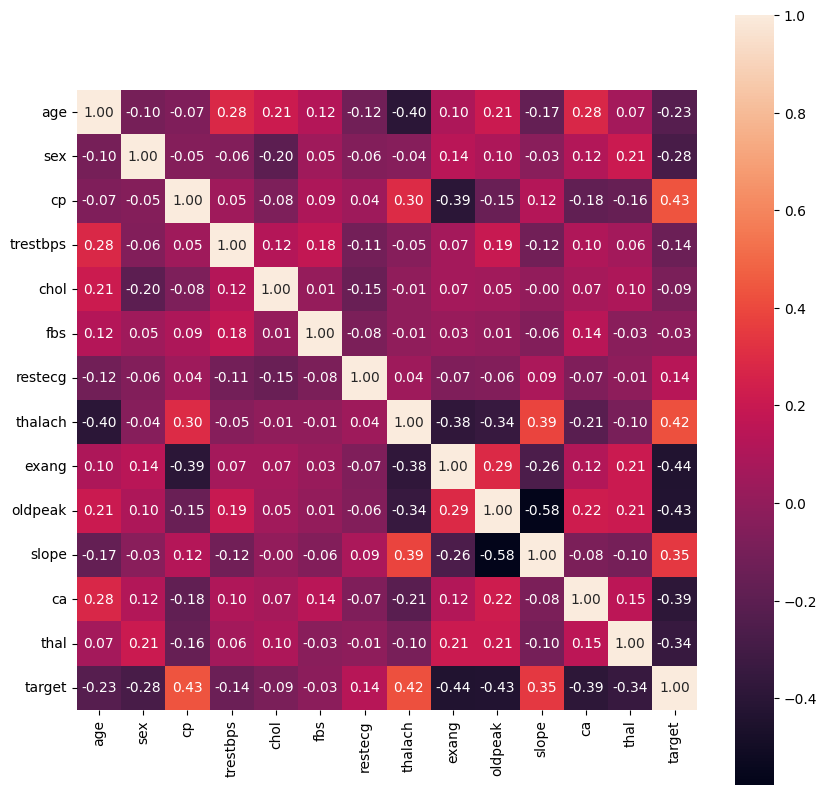

In [24]:
# Correlation 
plt.figure(figsize=(10, 10))

hm=sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10})

In [25]:
# There is a positive correlation between target and chest pain, thalach (max heart rate achieved) and target also 
# slope and target has a positive correlation.

## FEATURE ENGINEERING

### Data Pre-Processing

In [26]:
# The columns we created for data visualization we need to take them out 
# ie the last four columns which are age_bracket, gender, cp_cat and label. 
# Also target(train and test) have to be removed.
# here train Examples taught (Is label & Marking script) Test (Exam) Lecturer access the exam and gives you a score.
# When predicting (The test), (=target) you remove them

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_bracket',
       'gender', 'cp_cat', 'label'],
      dtype='object')

In [28]:
# Create a copy of the data (Exclude target / Label alongside other columns that was created)
df1 = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# the target column is defined as label; this is now our marking script(answer) the predicting value we removed.
label = df[["target"]]


In [29]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [31]:
# FOR ML we work with only integers or float. if there is an object we change it.

In [32]:
# To check the types
df1.dtypes #they are all integers only 1 float.

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

### Normalization Technique using Min Max Scaler 
Normalize the data here; All numbers lie between 0 and 1 to remove outliers)


In [33]:
# Dealing with outliers -"resting_blood_pressure", "Cholesterol","thalassemia (a blood disorder that affects the oxygen carrying capacity of the blood)"


scaler=MinMaxScaler()
df1["Scaled_RBP"]=scaler.fit_transform(df1["trestbps"].values.reshape(-1,1))
df1["Scaled_chol"]=scaler.fit_transform(df1["chol"].values.reshape(-1,1))
df1["Scaled_thal"]=scaler.fit_transform(df1["thal"].values.reshape(-1,1))
df1["Scaled_max_heart_rate"]=scaler.fit_transform(df1["thalach"].values.reshape(-1,1))

df1.drop(["trestbps","chol","thal","thalach"], axis=1, inplace=True) # take the columns away ie drop the columns and replace it with the scaler
df1.head()

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## MACHINE LEARNING

In [34]:
# SPLIT the dataset into training and testing sets. X_train is Practice Question, y_train =Answers during training 
# y_test is for the examiner(marking script), test_size 20% to test, random state (half of the train randomly =40)
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [35]:
df1.shape # 303 rows 13 columns

(303, 13)

In [36]:
label.shape

(303, 1)

In [37]:
X_train.head()

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389


In [38]:
y_train.head()

,target
132,1
202,0
196,0
75,1
176,0


In [39]:
X_train

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,0,1,0,0.6,1,1,0.433962,0.244292,1.000000,0.702290
71,51,1,2,0,1,1,0.0,2,1,0.000000,0.230594,1.000000,0.633588
106,69,1,3,1,0,0,0.1,1,1,0.622642,0.246575,0.666667,0.458015
270,46,1,0,0,0,0,0.8,2,0,0.245283,0.280822,1.000000,0.557252


In [40]:
# Model Building

# Logistic Regression
logreg=LogisticRegression() #logreg is a variable can be called any name or LR

logreg.fit(X_train, y_train) #train the logreg
ly_pred=logreg.predict(X_test) #ly_pred is a variable, X_test is the exam.
# after training predict X_test

print("Logistic Regression")
print("Accuracy:", accuracy_score (y_test, ly_pred))
print("Precision:",precision_score(y_test, ly_pred)) 
print("Recall:",recall_score(y_test, ly_pred))
print("F1-score:",f1_score(y_test, ly_pred))
print("AUC-ROC:",roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


In [41]:
X_test

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
179,57,1,0,0,0,1,0.6,1,1,0.528302,0.342466,0.333333,0.312977
228,59,1,3,0,0,0,0.2,1,0,0.716981,0.369863,1.000000,0.671756
111,57,1,2,1,1,0,0.2,2,1,0.528302,0.000000,1.000000,0.778626
246,56,0,0,0,0,1,1.9,1,2,0.377358,0.646119,1.000000,0.603053
60,71,0,2,1,0,0,0.0,2,1,0.150943,0.317352,0.666667,0.450382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,0,0,0,2.0,1,3,0.433962,0.292237,1.000000,0.572519
104,50,1,2,0,1,0,0.0,2,0,0.330189,0.159817,0.666667,0.702290
300,68,1,0,1,1,0,3.4,1,2,0.471698,0.152968,1.000000,0.534351
193,60,1,0,0,0,1,2.8,1,2,0.481132,0.356164,1.000000,0.541985


In [42]:
ly_pred# predicted values of y

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

i. Accuracy - 85% of the predicted values of y were accurate compared to the target 

ii. Precision - 87% of the predicted values of y was precised compared to the target/ label value of y

iii. Recall - 84% of the predicted values of y was correct compared to the 

iv. F1 score - 86% of the predicted values of y, its used when there is an imbalance in the data set.

v. AUC_ROC - 85%

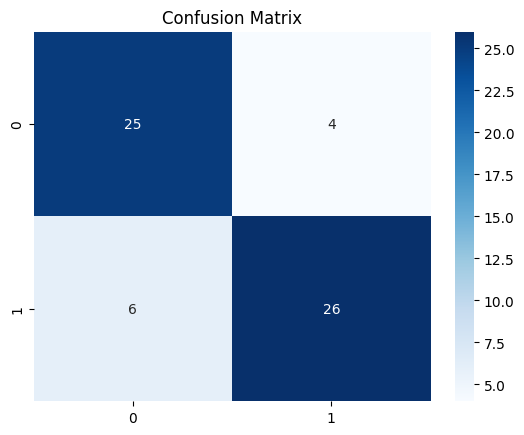

In [43]:
# Confusion matrix

# lcm- Logistics Confusion Matrix

lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel;("Predicted")
plt.ylabel;("Actual")
plt.title("Confusion Matrix")
plt.show()

In [44]:
# Model Building
#Random Forest Classifier
rfc =RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score (y_test, ly_pred))
print("Precision:",precision_score(y_test, ly_pred)) 
print("Recall:",recall_score(y_test, ly_pred))
print("F1-score:",f1_score(y_test, ly_pred))
print("AUC-ROC:",roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1-score: 0.8387096774193549
AUC-ROC: 0.8372844827586207


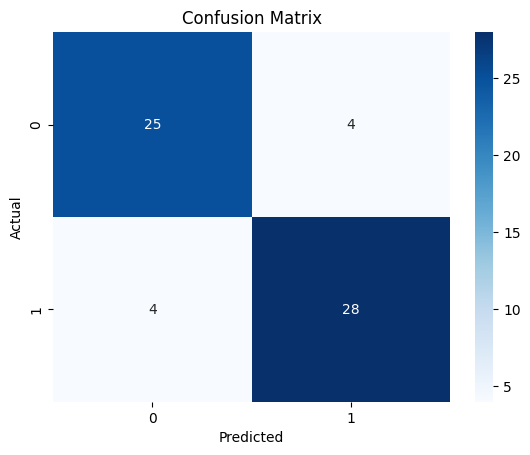

In [45]:
# Confusion matrix

# rcm- Confusion Matrix

rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### The Random Forest Confusion Matrix predicted that:
    
25 people with No HEART disease

28 people have heART DISEASE

4 had no HD, but in the real sense they had heart disease ( Here this person is going to die)

5 had HD in real sense no HD



### Comparing the Confusion Matrix of Random Forest with Logistic Regression to Optimize (Reduce Error)

1. I would chose Random Forest as it predicted more correctly when compared with LR

# 8 ML Algorithms will be applied to the dataset

In [46]:
# 8 ML Algorithms will be applied to the dataset

classifiers= [[XGBClassifier(), "XGB Classifier" ], 
              [RandomForestClassifier(), "RandomForest" ],
              [KNeighborsClassifier(), "K-Nearest Neighbors" ],
              [SGDClassifier(), "SGD Classifier"],
              [SVC(), "SVC"],
              [GaussianNB(), "Naive Bayes"],
              [DecisionTreeClassifier(random_state =42), "Decision tree"],
              [LogisticRegression(), "Logistic Regression"]
             ]


In [47]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'RandomForest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeCl

In [48]:
# for loop
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name=classifier[1]
    
    pred = model.predict(X_test)
    
    a_score =accuracy_score(y_test, pred)
    p_score =precision_score(y_test, pred)
    r_score =recall_score(y_test, pred)
    roc_score =roc_auc_score(y_test, pred)
    
    acc_list[model_name]= ([str(round(a_score*100, 2)) + "%"])
    precision_list[model_name]= ([str(round(p_score*100, 2)) + "%"])
    recall_list[model_name]= ([str(round(r_score*100, 2)) + "%"])
    roc_list[model_name]= ([str(round(roc_score*100, 2)) + "%"])
   
    
    if model_name !=classifiers[-1][1]:
        print("")

In [49]:
classifier[0]

LogisticRegression()

In [50]:
classifiers[1][1]

'RandomForest'

In [51]:
classifiers[0][1]

'XGB Classifier'

In [52]:
classifiers[2][0]

KNeighborsClassifier()

In [53]:
classifiers[2][1]

'K-Nearest Neighbors'

In [54]:
# All the accuracies at a glance

acc_list

{'XGB Classifier': ['81.97%'],
 'RandomForest': ['85.25%'],
 'K-Nearest Neighbors': ['75.41%'],
 'SGD Classifier': ['59.02%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['85.25%'],
 'Logistic Regression': ['83.61%']}

In [55]:
# Putting Accuracy score in a dataframe

print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,RandomForest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,85.25%,75.41%,59.02%,65.57%,86.89%,85.25%,83.61%


In [56]:
# Putting Precision score in a dataframe

print(" Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

 Precision Score


,XGB Classifier,RandomForest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,84.85%,79.31%,56.14%,65.71%,90.0%,92.59%,86.67%


In [57]:
# Putting Recall score in a dataframe

print(" Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

 Recall


,XGB Classifier,RandomForest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,78.12%,87.5%,71.88%,100.0%,71.88%,84.38%,78.12%,81.25%


In [58]:
# Putting ROC score in a dataframe

print(" ROC Score")
s2 = pd.DataFrame(roc_list)
s2.head()

 ROC Score


,XGB Classifier,RandomForest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,82.17%,85.13%,75.59%,56.9%,65.25%,87.02%,85.61%,83.73%


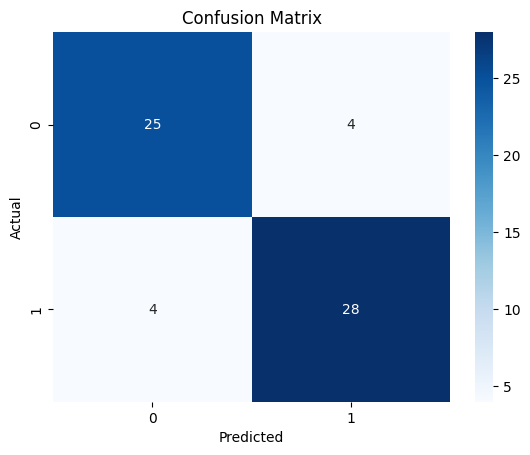

In [59]:
# Confusion matrix

# rcm- Confusion Matrix

rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
I choose Random Forest Confusion Matrix which predicted more correctly.

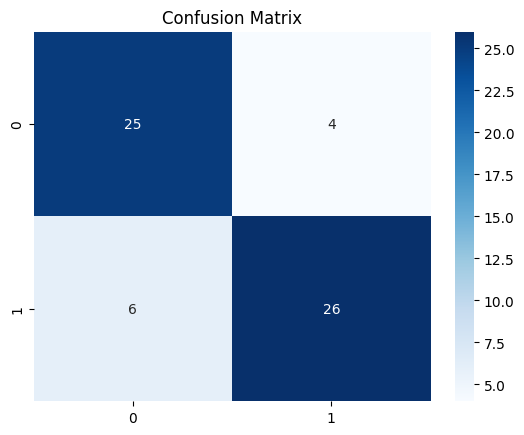

In [60]:
# Confusion matrix

# lcm- Logistics Confusion Matrix

lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel;("Predicted")
plt.ylabel;("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
Heart Disease Prediction:
I discovered that the dataset was clean and had no missing data.
I carried out a descriptive statistics summary of the dataset. I found it had outliers: In the resting blood pressure, cholesterol, max. heart rates and thalassemia.

Then categorised the age group into: elderly, adult, old adult and youths.
I carried out Exploratory Data analysis of the dataset (univariate, bivariate, and multivariate) to discover patterns, relationships, and insights.

Technologies Used: Python
My Role: I used machine learning models to predict whether patients had heart disease or not. Logistic Regression and Random Forest Classifiers and 6 others to carry out the predictions. 
Random Forest Classifier predicted accurately with a precision rate of 87% of the patients had heart disease. 
Comparing the Confusion Matrix of Random Forest with Logistic Regression to Optimize (Reduce Error), Random Forest predicted more correctly when compared with Logistic Regression.
